<a href="https://colab.research.google.com/github/mulcahrj/DATA6505_Final/blob/main/Final_Project_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

____________________________________________________________
# Spotify Top 200
Charting By week (Jan-2020 to Jul-2021)
____________________________________________________________


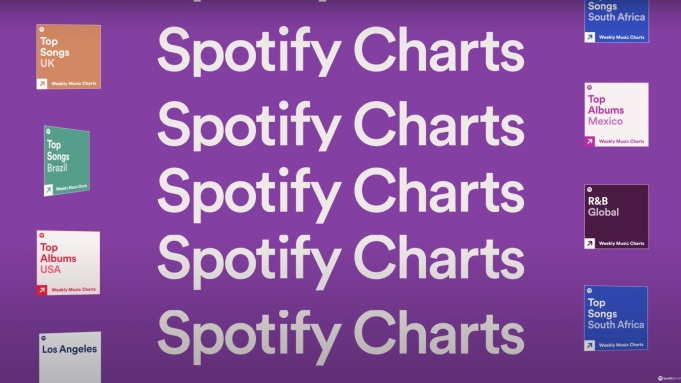

# Table of Contents

**Table of Contents**
1. Introduction
2. Data Dictionary
3. Getting the Data & Dataset Overview
4. Cleaning the Data
5. Creating New Columns
6. Exploring the Data
7. Analysis & Conclusions

# 1. Introduction

How long on average until you know if your song will break into top 200 on Spotify?  

And again by genre, dancability, valence, chord, energy?

Do high energy songs rise to the top 200 faster than lower energy songs?  Does dancability have an impact on how a song fares in the charts?  Do audiences prefer certain chords over others?

We are proposing a consulting service aimed at helping musicians crack the Spotify algorithm to maximize thier chances of reaching the top 200, and optimizing their revenue earned from streaming hit songs.  These are some of the questions we would like to know to understand what makes a successful song.

# 2. Data Dictionary & Glossary

## Data Dictionary


| Column | Data Type | Definition | 
| ------------ | ---------- | --- |
| Index | int64 | Key for each row |
| Highest Charting Position | int64 | Highest charted position in Spotify top 200
| Week of Highest Charting | int64 | Week of highest charting position in Spotify top 200
| Number of times Charted | int64 | How many weeks the song was in Spotify top 200 
| Song Name | object | Song name 
| Streams |object | Total number of global streams 
| Artist | object | Artist name 
| Artist Followings |object | Number of Spotify followers for artist 
| Song ID | object| Spotify unique song identifier 
| Genre | object | Genres tagged for artist 
| Release Date | object | Release date of song 
| Weeks Charted | object| The weeks the song was charted in Spotify top 200
|Danceability | object | Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
| Energy | object | Measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
| Loudness | object | The overall loudness of a track in decibels (dB). Values typical range between -60 and 0 db.
| Speechiness | object | Speechiness detects the presence of spoken words in a track.
| Acousticness | object | Confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
| Tempo | object | The overall estimated tempo of a track in beats per minute (BPM).|
| Duration (ms) | object | Length of song in milliseconds
| Valence | object | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
| Chord | object | Indetifies the harmonic set of pitches/frequencies consisting of multiple notes of that track. 

## Glossary

**Pandas**: Open source software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license.

**Numpy**: A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Matplotlib**: A plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

**Datetime**: The datetime module supplies classes for manipulating dates and times. While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

**Calendar**: This module allows output calendars like the program and provides additional useful functions related to the calendar. Functions and classes defined in the Calendar module use an idealized calendar, the current Gregorian calendar extended indefinitely in both directions. 

# 3. Getting the Data & Dataset Overview

Once the data is loaded, we need to peek around and see if there are any issues that need to be addressed before we start doing analysis.

## Data Source

The data used in this project comes from:

Spotify Top 200 Charts (2020-2021)
 : https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021

## Loading the data
and Exploring what it has to offer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pylab as plt
import datetime as dt
import calendar as cr
plt.style.use('fivethirtyeight')

spf_data = pd.read_csv("https://raw.githubusercontent.com/mulcahrj/DATA6505_Final/main/spotify_data.csv")

# Getting the shape of the dataset
spf_data.shape

(1556, 23)

## Overview of Dataset

In [ ]:
# Getting a preview of the columns
spf_data.head(2)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db


In [ ]:
# Odd that we find so many objects when in the preview above, there should be
# many columns that are either float or int
spf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
# Calculating percentage of null values.. something strange is going on
# as we see no nulls across the entire dataset, or we are extremely lucky (unlikely)

(spf_data.isnull().sum()/(spf_data.notnull().sum()+spf_data.isnull().sum())).round(4)*100

Index                        0.0
Highest Charting Position    0.0
Number of Times Charted      0.0
Week of Highest Charting     0.0
Song Name                    0.0
Streams                      0.0
Artist                       0.0
Artist Followers             0.0
Song ID                      0.0
Genre                        0.0
Release Date                 0.0
Weeks Charted                0.0
Popularity                   0.0
Danceability                 0.0
Energy                       0.0
Loudness                     0.0
Speechiness                  0.0
Acousticness                 0.0
Liveness                     0.0
Tempo                        0.0
Duration (ms)                0.0
Valence                      0.0
Chord                        0.0
dtype: float64

# 4. Cleaning the data
Clearing NAs, converting columns to integers and making the dataset usable for later analysis

## Clearing NAs

In [ ]:
# Since we know there are some empty columns in index 36 song, we are looking
# at this title specifically to find out what's going on in one of these 
# empty-but-not-empty cells

i36_df = spf_data[spf_data['Index'] == 36]
i36_df

In [ ]:
# We find that 'genre' column seems empty, but find there is a str length of '1'

i36_df['Genre_ct'] = i36_df['Genre'].str.len()
i36_df[['Index','Song Name','Artist','Genre','Genre_ct']]

In [ ]:
# Checking the data type of 'Genre_ct' and find it's an object
# We will need to write a function to replace this with something else

i36_df[['Genre']].dtypes

In [ ]:
# We see that Pandas data type object means string, so we will need to convert
# several columns to int/float.. but first is to sort out the cells with 
# a space in them instead of null.  Here we replace any cells with nothing to 
# NaN to handle them properly, first on the index=36 dataframe but will do this
# to the main dataset too

i36_df = i36_df.replace(r'^\s*$', np.nan, regex=True)
i36_df

In [ ]:
# Once we replace empty cells with NaN in the full dataframe and re-check 
# for null values, we get this: a small percentage of rows without data, in
# this case, less than 1%.  Because it's such a small population, we will 
# remove these from analysis

spf_data_nan = spf_data.replace(r'^\s*$', np.nan, regex=True)

(spf_data_nan.isnull().sum()/(spf_data_nan.notnull().sum()+spf_data_nan.isnull().sum())).round(4)*100

In [ ]:
# We drop any rows with NaN values in them, and test this correctly
# included row 36, which it does.

spf_data_nan = spf_data_nan.dropna()
spf_data_nan[spf_data_nan['Index'] == 36]

In [ ]:
# One last check, confirming we have 0 null counts for the 
# spf_data_nan dataframe

spf_data_nan.isnull().sum()

## Removing incorrectly filled Release Date songs

In [ ]:
# Removing songs with date fields that has misformatted date fields for release date

date_anomalies = ['1962','1963','1981','1990','1994','1995','2002','2012','2014','2015','2016','1957-09']

spf_data_nan = spf_data_nan[~spf_data_nan['Release Date'].isin(date_anomalies)]

In [ ]:
# Checking those misformatted date field songs are no longer in the dataset

date_anomalies = ['1962','1963','1981','1990','1994','1995','2002','2012','2014','2015','2016','1957-09']
filter_date_an = spf_data_nan['Release Date'].isin(date_anomalies)
spf_data_nan[filter_date_an]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord


## Removing extraneous characters
from a few columns to make them more usable in caclulations and charting

In [ ]:
# Remove commas in stream to convert to int
# and remove apostrophes in Genre to split/turn into list elements

spf_data_nan.replace({'Streams':{',':''}}, regex=True, inplace=True)
spf_data_nan['Genre'].replace('\'','', regex=True, inplace=True) 
spf_data_nan.head(5)


In [ ]:
#Converting columns to the 'correct' data type

spf_data_nan.astype({'Streams':'int32','Artist Followers': 'int32',
                     'Popularity':'int32','Danceability': 'float32',
                     'Energy': 'float32','Loudness': 'float32',
                     'Speechiness': 'float32','Acousticness': 'float32',
                     'Liveness': 'float32','Tempo': 'float32',
                     'Duration (ms)':'int32','Valence': 'float32',
                     'Chord': 'category'}).dtypes

## Manually cleaning some genre columns

In [ ]:
# Cleaning the Genre column, had to hard code some instances to correct here where
# code didn't catch

spf_data_artgen = spf_data_nan.groupby('Artist')['Genre'].unique().apply(' '.join).reset_index()

spf_data_artgen['Genre'] = spf_data_artgen['Genre'].str.strip('[]')

spf_data_artgen['Genre'].apply(lambda x: x.replace('','').replace(']',''))

correct = ["A Boogie Wit da Hoodie","Ava Max","Billie Eilish","Coldplay","Dua Lipa","Ed Sheeran",
           "J Balvin","Jack Harlow","Justin Bieber","Lady Gaga","Luísa Sonza","Nat King Cole",
           "Playboi Carti","Selena Gomez","Shawn Mendes","Tones And I",'Travis Scott','NLE Choppa']

spf_data_artgen.loc[(spf_data_artgen.Artist == "A Boogie Wit da Hoodie"), 'Genre'] = 'melodic rap, pop rap, rap, trap'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Ava Max"), 'Genre'] = 'dance pop, pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Billie Eilish"), 'Genre'] = 'electropop, pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Coldplay"), 'Genre'] = 'permanent wave, pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Dua Lipa"), 'Genre'] = 'dance pop, pop, uk pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Ed Sheeran"), 'Genre'] = 'pop, uk pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "J Balvin"), 'Genre'] = 'latin, reggaeton, reggaeton colombiano'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Jack Harlow"), 'Genre'] = 'deep underground hip hop, kentucky hip hop, pop rap, rap, canadian hip hop, canadian trap, melodic rap, pop rap, r&b, rap, toronto rap, trap'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Justin Bieber"), 'Genre'] = 'canadian pop, pop, post-teen pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Lady Gaga"), 'Genre'] = 'dance pop, pop, post-teen pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Luísa Sonza"), 'Genre'] = 'funk carioca, pop nacional'
spf_data_artgen.loc[(spf_data_artgen.Artist == "NLE Choppa"), 'Genre'] = 'melodic rap, rap, trap, memphis hip hop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Nat King Cole"), 'Genre'] = 'adult standards, lounge, soul, vocal jazz'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Playboi Carti"), 'Genre'] = 'atl hip hop, plugg, rap, trap'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Selena Gomez"), 'Genre'] = 'dance pop, pop, post-teen pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Shawn Mendes"), 'Genre'] = 'canadian pop, dance pop, pop, post-teen pop, viral pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Tones And I"), 'Genre'] = 'australian pop, pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Travis Scott"), 'Genre'] = 'rap, slap house, rap, trap'

filter = spf_data_artgen['Artist'].isin(correct)

# Verifying the manual adjustments worked
spf_data_artgen[filter]

## Cleaned up dataset

In [ ]:
# Checking all data types after calcs and conversions
spf_clean.dtypes

Index                                 int64
Highest Charting Position             int64
Number of Times Charted               int64
Week of Highest Charting             object
Song Name                            object
Streams                              object
Artist                               object
Artist Followers                     object
Song ID                              object
Release Date                 datetime64[ns]
Weeks Charted                        object
Popularity                           object
Danceability                         object
Energy                               object
Loudness                             object
Speechiness                          object
Acousticness                         object
Liveness                             object
Tempo                                object
Duration (ms)                        object
Valence                              object
Chord                                object
Genre                           

# 5. Creating New Columns

For dates and genre


## Genre Column

In [ ]:
# Merging the cleaned genre back into main dataframe
spf_clean = spf_data_nan.merge(spf_data_artgen, on='Artist', how='left')

# Compiling final Genre column and filling N/As with empty cells
spf_clean['Genre'] = spf_clean['Genre_y'].fillna("")

# Dropping the original columns from the merge
spf_clean = spf_clean.drop(['Genre_x','Genre_y'], axis = 1)

spf_clean.head(2)

In [ ]:
# Splitting Genre into lists of strings

spf_clean['Genre'] = spf_clean.Genre.apply(lambda x: x.split(','))
spf_clean.head(2)

In [ ]:
pop_filter = spf_clean[spf_clean.Genre.apply(lambda x: 'pop' in x)]
pop_filter.head(2)

## Date Columns

In [ ]:
# Convert release date to datetime format for later calculations
spf_clean['Release Date'] = pd.to_datetime(spf_clean['Release Date'])

spf_clean['Release Date'] = pd.to_datetime(spf_clean['Release Date'])

#split column into two 
spf_clean['Week of Highest Charting'].str.split('--', n=1, expand=True)

#creates the columns
spf_clean[['Start_Highest_Charting','End_Highest_Charting']] = spf_clean['Week of Highest Charting'].str.split('--', n=1, expand=True)

#convert to data time
spf_clean['Start_Highest_Charting'] = pd.to_datetime(spf_clean['Start_Highest_Charting'])

#convert to date time
spf_clean['End_Highest_Charting'] = pd.to_datetime(spf_clean['End_Highest_Charting'])

#calc time to highest charting and convert to int
spf_clean['Start_to_Highest'] = (spf_clean['End_Highest_Charting'] - spf_clean['Release Date']).dt.days
spf_clean['Start_to_Highest'].astype(int)

In [ ]:
#split to find earliest charting by taking first 10 characters of 'Weeks Charted'
# Column to get the earliest charted week in YYYY-MM-DD format
spf_clean['Earliest Charting'] = spf_clean['Weeks Charted'].str[-10:]

# and convert to datetime
spf_clean['Earliest Charting'] = pd.to_datetime(spf_clean['Earliest Charting'])

In [ ]:
# Calculating new column to be the difference of earliest charting date from release date
# and checking output
spf_clean['Start_to_Earliest'] = (spf_clean['Earliest Charting'] - spf_clean['Release Date']).dt.days

# Verifying days start_to_earliest calc look correct in the column
spf_clean[['Start_to_Earliest','Earliest Charting','Release Date']]

## Highest Charted Position

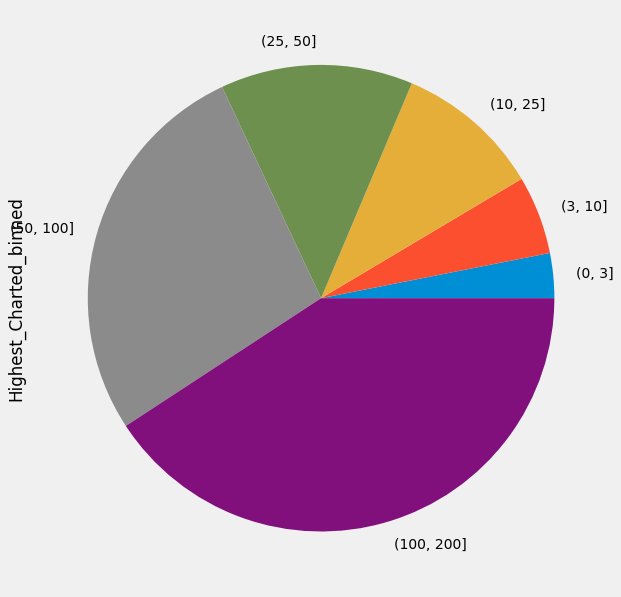

In [ ]:
pie1 = spf_clean.Highest_Charted_binned.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

In [ ]:
#0 meeds to be included or else it won't pick up 1 in Highest Charting Position
bins = [0, 3, 10, 25, 50, 100, 200]
spf_clean['Highest_Charted_binned'] = pd.cut(spf_clean['Highest Charting Position'], bins)

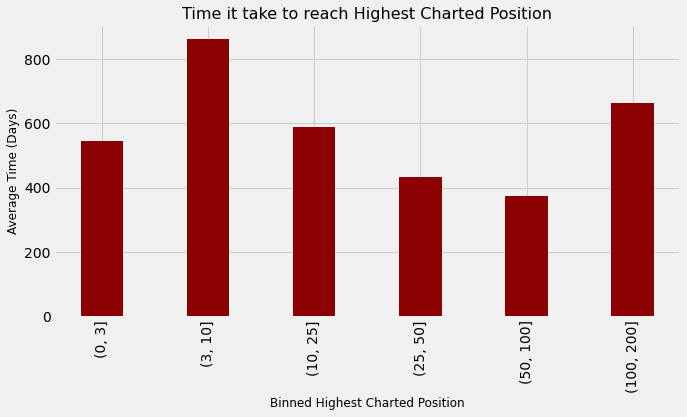

In [ ]:
#highest binned vs time to highest charted point
plot1 = spf_clean.groupby('Highest_Charted_binned').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot1.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot1.set_xlabel('Binned Highest Charted Position',fontsize=12)
plot1.set_ylabel('Average Time (Days)',fontsize=12)
plot1.get_legend().remove()
plt.show()

# 6. Exploring the Data

## Speechiness

In [ ]:
#convert speechiness as float type
spf_clean['Speechiness'] = spf_clean['Speechiness'].astype(float)

In [ ]:
#creating bins for the speech column
Speech_bins = [0, 0.125, 0.25, 0.375, 1]
spf_clean['Speech_binned'] = pd.cut(spf_clean['Speechiness'], Speech_bins)

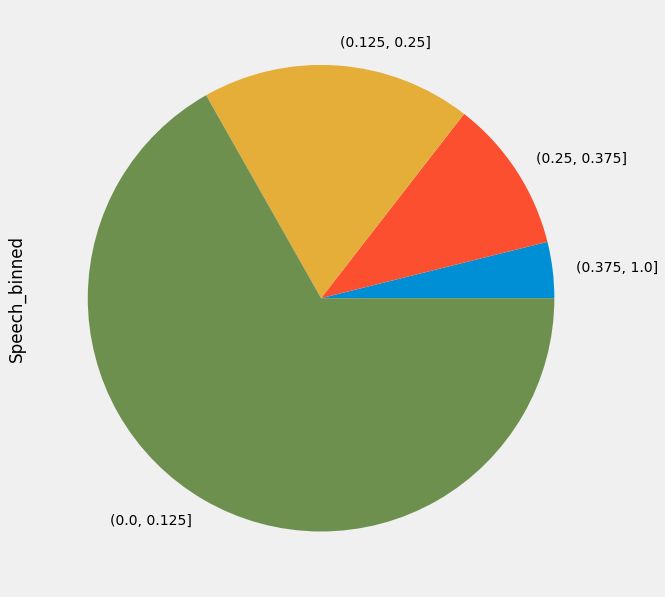

In [ ]:
pie1 = spf_clean.Speech_binned.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

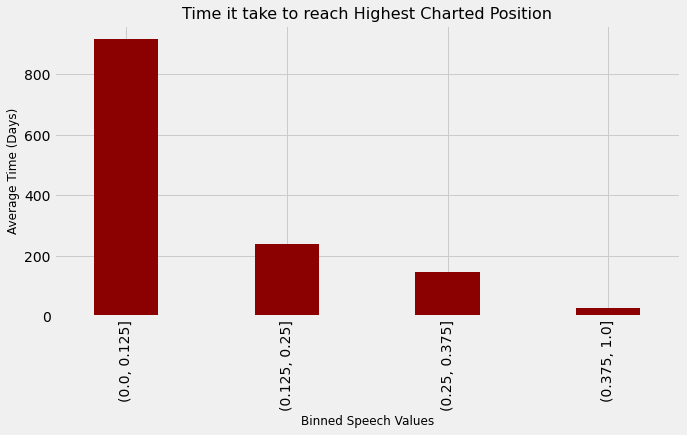

In [ ]:
#plots binned speech vs time to highest charting
plot2 = spf_clean.groupby('Speech_binned').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot2.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot2.set_xlabel('Binned Speech Values',fontsize=12)
plot2.set_ylabel('Average Time (Days)',fontsize=12)
plot2.get_legend().remove()
plt.show()

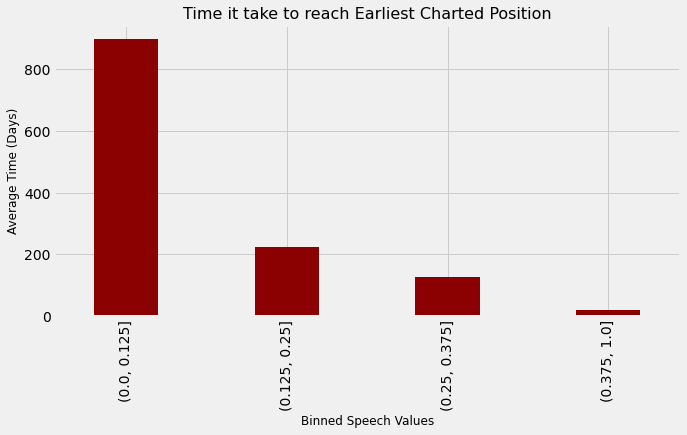

In [ ]:
plot3 = spf_clean.groupby('Speech_binned').agg({'Start_to_Earliest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot3.set_title('Time it take to reach Earliest Charted Position',fontsize=16)
plot3.set_xlabel('Binned Speech Values',fontsize=12)
plot3.set_ylabel('Average Time (Days)',fontsize=12)
plot3.get_legend().remove()
plt.show()

## Energy

In [ ]:
#convert energy to float
spf_clean['Energy'] = spf_clean['Energy'].astype(float)

In [ ]:
#convert energy to bins
energy_bins = [0, 0.375, 0.5, 0.625, 0.75, 0.875,1]
spf_clean['energy_bins'] = pd.cut(spf_clean['Energy'], energy_bins)

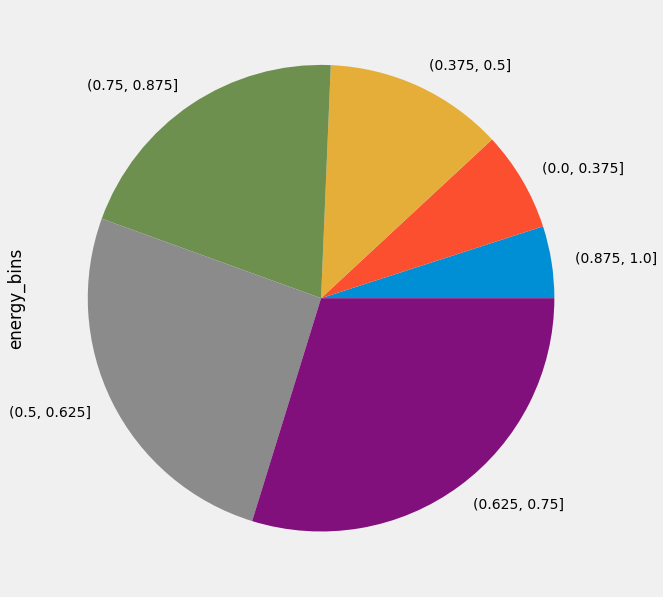

In [ ]:
pie1 = spf_clean.energy_bins.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

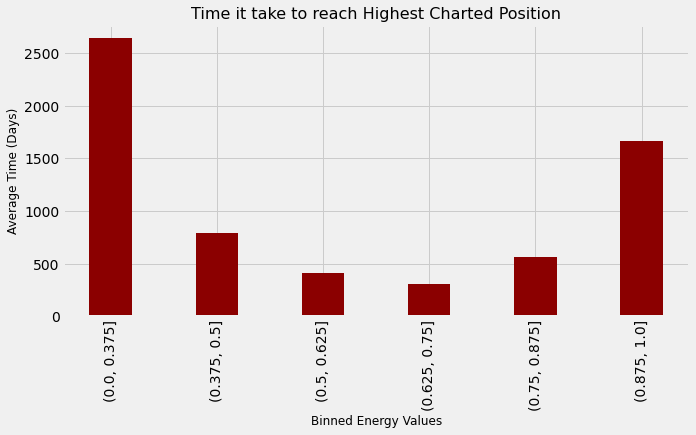

In [ ]:
#plots energy bins vs start to highest
plot4 = spf_clean.groupby('energy_bins').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot4.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot4.set_xlabel('Binned Energy Values',fontsize=12)
plot4.set_ylabel('Average Time (Days)',fontsize=12)
plot4.get_legend().remove()
plt.show()

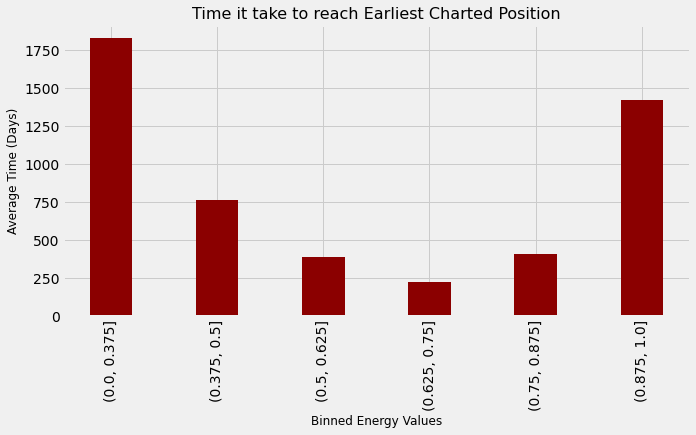

In [ ]:
plot5 = spf_clean.groupby('energy_bins').agg({'Start_to_Earliest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot5.set_title('Time it take to reach Earliest Charted Position',fontsize=16)
plot5.set_xlabel('Binned Energy Values',fontsize=12)
plot5.set_ylabel('Average Time (Days)',fontsize=12)
plot5.get_legend().remove()
plt.show()

## Valence

In [ ]:
#converts valance as float
spf_clean['Valence'] = spf_clean['Valence'].astype(float)

In [ ]:
#creating bins for the valance column
valance_bins = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875,1]
spf_clean['valance_bins'] = pd.cut(spf_clean['Valence'], energy_bins)

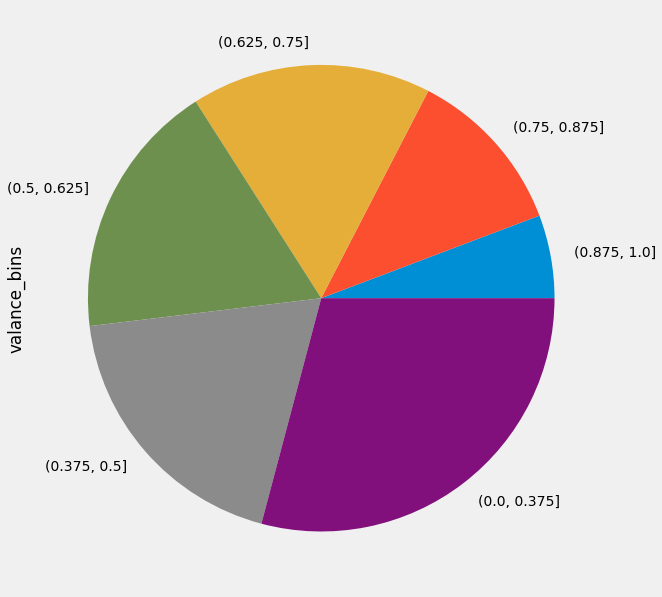

In [ ]:
pie1 = spf_clean.valance_bins.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

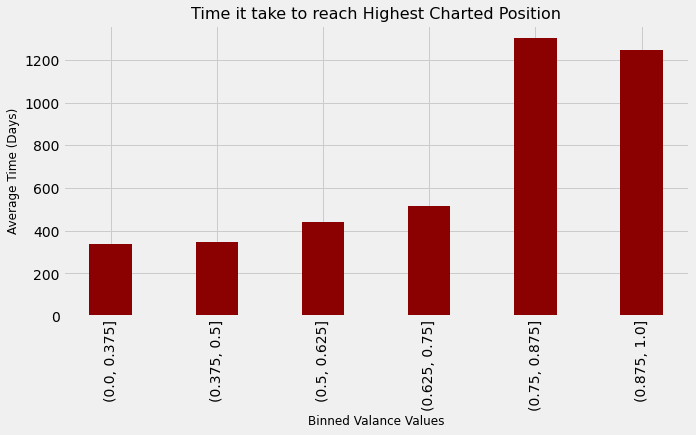

In [ ]:
#plots energy bins vs start to highest
plot6 = spf_clean.groupby('valance_bins').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot6.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot6.set_xlabel('Binned Valance Values',fontsize=12)
plot6.set_ylabel('Average Time (Days)',fontsize=12)
plot6.get_legend().remove()
plt.show()

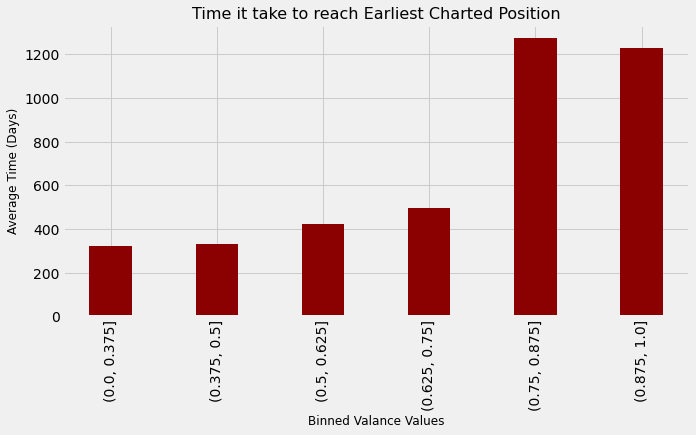

In [ ]:
plot7 = spf_clean.groupby('valance_bins').agg({'Start_to_Earliest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot7.set_title('Time it take to reach Earliest Charted Position',fontsize=16)
plot7.set_xlabel('Binned Valance Values',fontsize=12)
plot7.set_ylabel('Average Time (Days)',fontsize=12)
plot7.get_legend().remove()
plt.show()

## Dancibility 

In [ ]:
#converts danceability as float
spf_clean['Danceability'] = spf_clean['Danceability'].astype(float)

In [ ]:
Danceability_bins = [0, 0.5, 0.625, 0.75, 0.875,1]
spf_clean['Danceability_bins'] = pd.cut(spf_clean['Danceability'], Danceability_bins)

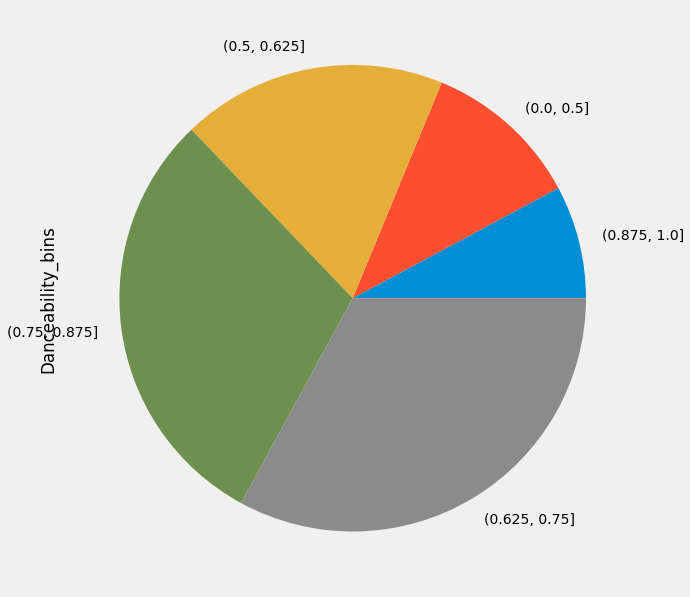

In [ ]:
pie1 = spf_clean.Danceability_bins.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

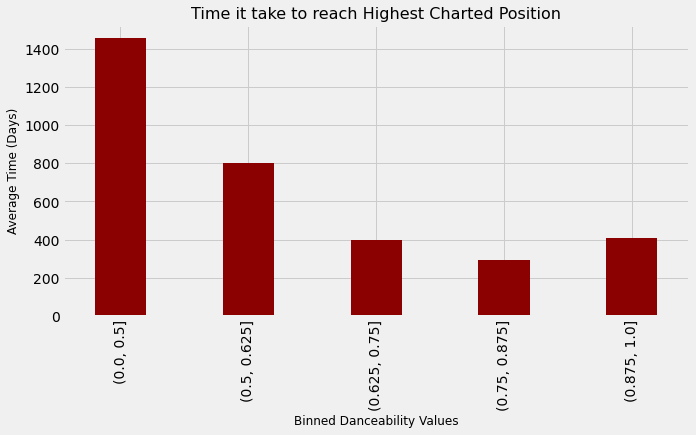

In [ ]:
plot8 = spf_clean.groupby('Danceability_bins').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot8.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot8.set_xlabel('Binned Danceability Values',fontsize=12)
plot8.set_ylabel('Average Time (Days)',fontsize=12)
plot8.get_legend().remove()
plt.show()

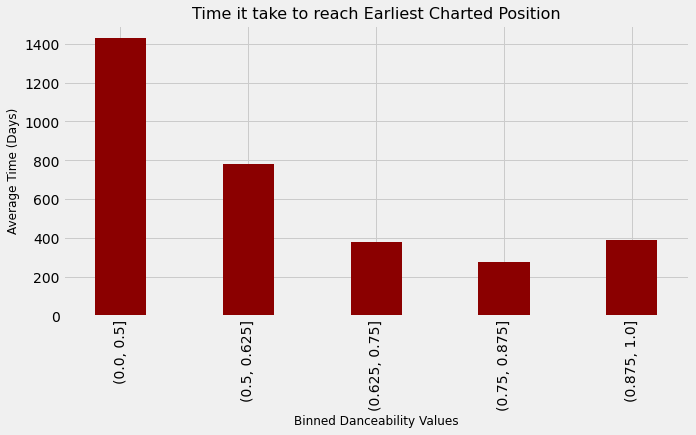

In [ ]:
plot9 = spf_clean.groupby('Danceability_bins').agg({'Start_to_Earliest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot9.set_title('Time it take to reach Earliest Charted Position',fontsize=16)
plot9.set_xlabel('Binned Danceability Values',fontsize=12)
plot9.set_ylabel('Average Time (Days)',fontsize=12)
plot9.get_legend().remove()
plt.show()

## Chord

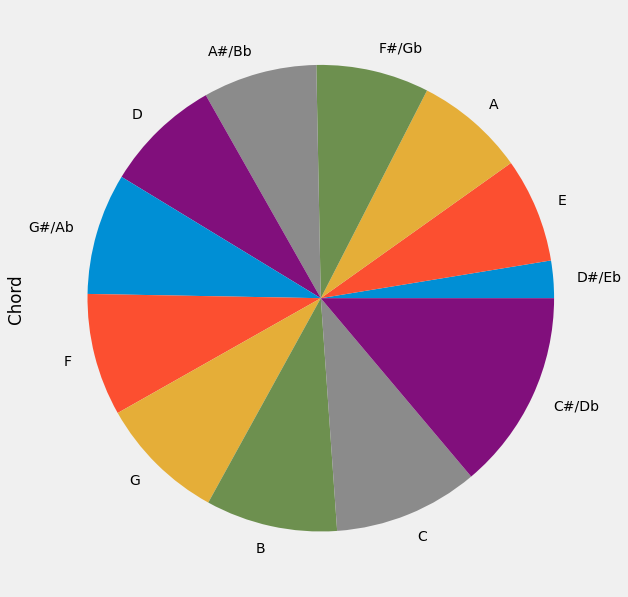

In [ ]:
pie1 = spf_clean.Chord.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

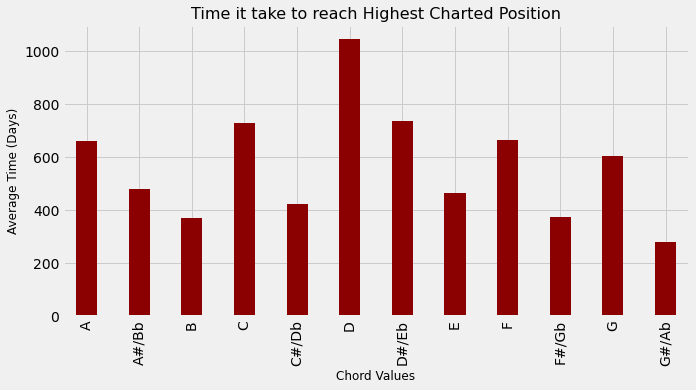

In [ ]:
plot11 = spf_clean.groupby('Chord').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot11.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot11.set_xlabel('Chord Values',fontsize=12)
plot11.set_ylabel('Average Time (Days)',fontsize=12)
plot11.get_legend().remove()
plt.show()

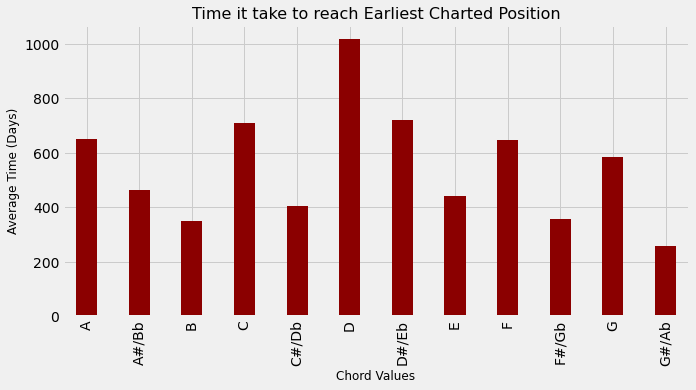

In [ ]:
plot11 = spf_clean.groupby('Chord').agg({'Start_to_Earliest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot11.set_title('Time it take to reach Earliest Charted Position',fontsize=16)
plot11.set_xlabel('Chord Values',fontsize=12)
plot11.set_ylabel('Average Time (Days)',fontsize=12)
plot11.get_legend().remove()
plt.show()

## Looking at Longevity

Does the valence, energy, and speechiness have an effect on how long a song is on the Top 200?



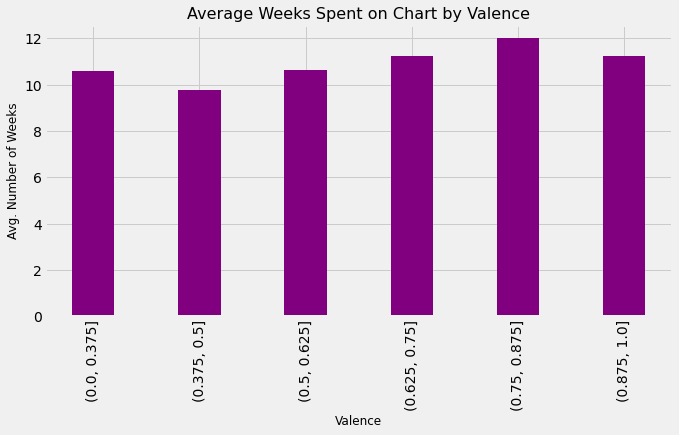

In [ ]:
# Valence
chart4 = spf_clean.groupby('valance_bins').agg({'Number of Times Charted':[np.mean]}).plot.bar(width = .4, color = 'purple', figsize=(10,5))
chart4.set_title('Average Weeks Spent on Chart by Valence',fontsize=16)
chart4.set_xlabel('Valence',fontsize=12)
chart4.set_ylabel('Avg. Number of Weeks',fontsize=12)
chart4.get_legend().remove()
plt.show()

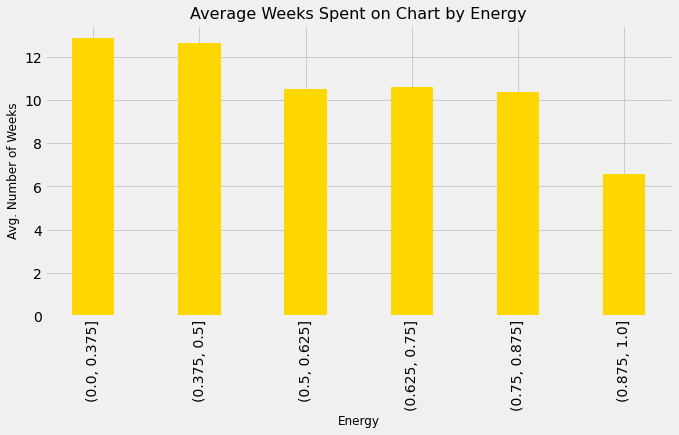

In [ ]:
# Energy

chart3 = spf_clean.groupby('energy_bins').agg({'Number of Times Charted':[np.mean]}).plot.bar(width = .4, color = 'gold', figsize=(10,5))
chart3.set_title('Average Weeks Spent on Chart by Energy',fontsize=16)
chart3.set_xlabel('Energy',fontsize=12)
chart3.set_ylabel('Avg. Number of Weeks',fontsize=12)
chart3.get_legend().remove()
plt.show()

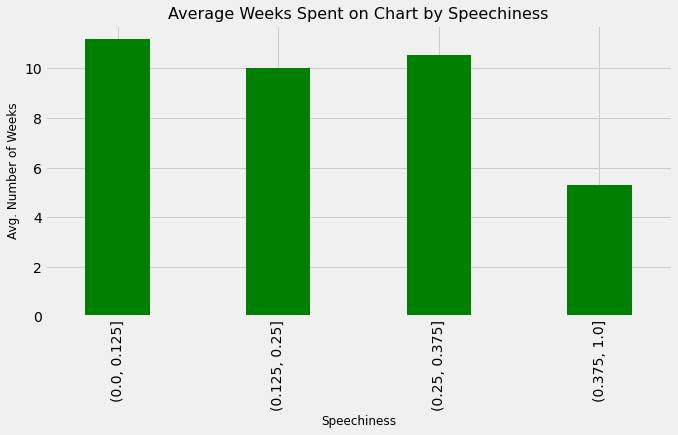

In [ ]:
# Speechiness

chart1 = spf_clean.groupby('Speech_binned').agg({'Number of Times Charted':[np.mean]}).plot.bar(width = .4, color = 'green', figsize=(10,5))
chart1.set_title('Average Weeks Spent on Chart by Speechiness',fontsize=16)
chart1.set_xlabel('Speechiness',fontsize=12)
chart1.set_ylabel('Avg. Number of Weeks',fontsize=12)
chart1.get_legend().remove()
plt.show()

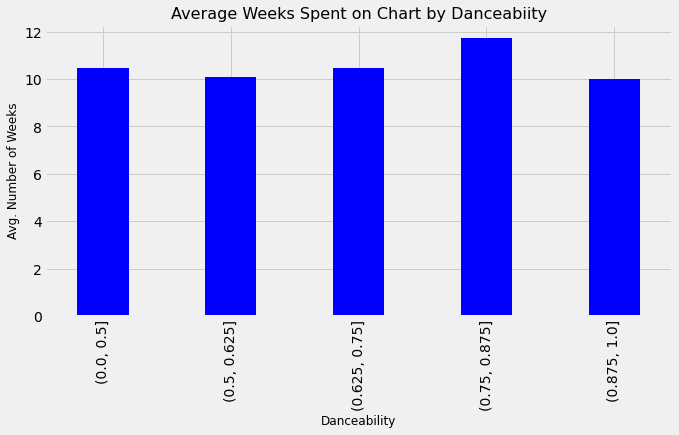

In [ ]:
# Danceability

chart2 = spf_clean.groupby('Danceability_bins').agg({'Number of Times Charted':[np.mean]}).plot.bar(width = .4, color = 'blue', figsize=(10,5))
chart2.set_title('Average Weeks Spent on Chart by Danceabiity',fontsize=16)
chart2.set_xlabel('Danceability',fontsize=12)
chart2.set_ylabel('Avg. Number of Weeks',fontsize=12)
chart2.get_legend().remove()
plt.show()

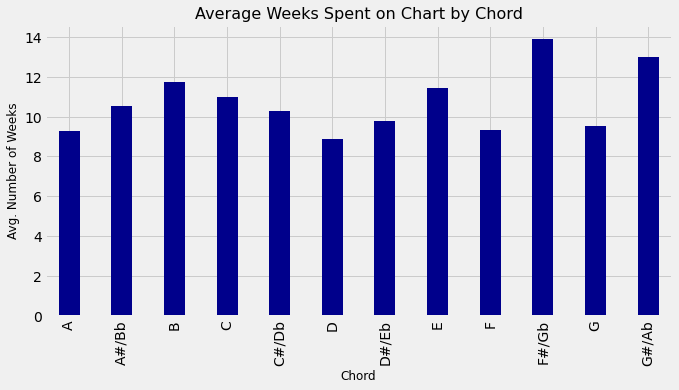

In [ ]:
# Chord

chart5 = spf_clean.groupby('Chord').agg({'Number of Times Charted':[np.mean]}).plot.bar(width = .4, color = 'darkblue', figsize=(10,5))
chart5.set_title('Average Weeks Spent on Chart by Chord',fontsize=16)
chart5.set_xlabel('Chord',fontsize=12)
chart5.set_ylabel('Avg. Number of Weeks',fontsize=12)
chart5.get_legend().remove()
plt.show()

# 7. Analysis & Conclusions